In [ ]:
import pandas as pd
import torch

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
all_df = pd.read_csv('2022_상폐1년전.csv', encoding='CP949')

In [ ]:
all_df = all_df.dropna().reset_index(drop=True)

In [ ]:
all_df

,회사명,자산총계,부채총계,자본총계,유동자산,유동부채,비유동자산,비유동부채,매출액,당기순이익,...,자기자본순이익률,총자산순이익률,고정장기적합률,부채비율,자기자본비율,유동비율,순운전자본비율,총자산회전율,폐지여부,폐지일자
0,3S(원03월결산),6.512786e+10,2.678888e+10,3.833899e+10,2.888501e+10,2.442367e+10,3.624285e+10,2.365204e+09,2.711063e+10,1.171370e+09,...,0.030553,0.017986,0.890396,0.698737,0.588673,1.182665,0.068501,0.416268,0.0,2023-05-06
1,AJ네트웍스(원12월결산),1.481450e+12,1.119560e+12,3.618860e+11,3.014700e+11,8.143650e+11,1.151950e+12,2.816130e+11,1.208370e+12,8.769534e+09,...,0.024233,0.005920,1.790130,3.093681,0.244279,0.370190,-0.346213,0.815668,0.0,2023-05-06
2,AK홀딩스(원12월결산),5.004330e+12,3.722000e+12,1.282340e+12,1.578820e+12,2.366670e+12,3.425520e+12,1.355330e+12,3.787960e+12,-1.190490e+11,...,-0.092837,-0.023789,1.298693,2.902508,0.256245,0.667105,-0.157434,0.756936,0.0,2023-05-06
3,APS(원12월결산),3.676380e+11,1.550300e+11,2.126070e+11,9.745597e+10,1.021250e+11,2.701820e+11,5.290513e+10,4.082193e+10,6.392560e+09,...,0.030067,0.017388,1.017586,0.729187,0.578306,0.954278,-0.012701,0.111039,0.0,2023-05-06
4,AP시스템(원12월결산),5.481130e+11,2.779140e+11,2.701990e+11,3.964710e+11,2.224210e+11,1.516420e+11,5.549255e+10,4.866080e+11,8.223767e+10,...,0.304359,0.150038,0.465601,1.028552,0.492963,1.782522,0.317543,0.887787,0.0,2023-05-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,에스에프씨,9.759819e+10,2.926527e+10,6.833292e+10,4.181369e+10,2.826785e+10,5.578450e+10,9.974213e+08,3.641600e+10,-8.894363e+09,...,-0.130162,-0.091132,0.804619,0.428275,0.700145,1.479196,0.138792,0.373122,1.0,2020-06-30 0:00:00
1821,이엘케이,5.554700e+10,1.049920e+11,-4.944500e+10,2.130200e+10,9.715500e+10,3.424600e+10,7.837000e+09,5.000500e+10,-6.458900e+10,...,1.306280,-1.162781,-0.823063,-2.123410,-0.890147,0.219258,-1.365564,0.900229,1.0,2020-05-22 0:00:00
1822,피앤텔,2.159703e+10,1.548310e+10,6.113929e+09,6.929006e+09,1.484680e+10,1.466803e+10,6.363008e+08,1.578328e+10,4.686700e+09,...,0.766561,0.217007,2.172967,2.532431,0.283091,0.466700,-0.366615,0.730808,1.0,2020-05-21 0:00:00
1823,에스마크,4.586700e+10,2.748900e+10,1.837900e+10,2.156900e+10,1.975600e+10,2.379200e+10,7.733000e+09,2.551000e+09,-1.452500e+10,...,-0.790304,-0.316676,0.911152,1.495674,0.400702,1.091770,0.039527,0.055617,1.0,2020-05-21 0:00:00


# Data Preparation

Normal Data, Anomal Data 여부를 분할

In [ ]:
normal_df = all_df[all_df['폐지여부'] == 0]
anomal_df = all_df[all_df['폐지여부'] == 1]

TODO : 대응표본추출로 데이터셋 교체

In [ ]:
test_normal_df = pd.read_csv('./2022_상폐1년전_대응표본.csv')
tmp_df = pd.concat([test_normal_df, normal_df])
train_val_df = tmp_df.drop_duplicates(subset=['회사명'], keep=False)


In [ ]:
test_df = pd.concat([test_normal_df, anomal_df])
train_df, val_df = train_test_split(train_val_df, test_size=0.1)

# Define Scaler

In [ ]:
feature_scaler = StandardScaler()
# feature_min_max_scaler = MinMaxScaler()
# stand_train_data = train_df[train_df.columns[2:13]]
stand_train_data = feature_scaler.fit_transform(train_df[train_df.columns[1:19]])

# stand_train_data = feature_min_max_scaler.fit_transform(stand_train_data)
stand_train_data_df = pd.DataFrame(data=stand_train_data)


In [ ]:
stand_train_data_df['Class'] = train_df['폐지여부'].values

In [ ]:
train_dataset = torch.utils.data.TensorDataset(torch.from_numpy(stand_train_data_df[stand_train_data_df.columns[:18]].to_numpy()).float())
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 1024, shuffle = True)


In [ ]:
stand_val_data = feature_scaler.transform(val_df[val_df.columns[1:19]])
# stand_val_data = val_df[val_df.columns[2:13]]
# stand_val_data = feature_min_max_scaler.transform(stand_val_data)
stand_val_data_df = pd.DataFrame(data=stand_val_data)

val_dataset = torch.utils.data.TensorDataset(torch.from_numpy(stand_val_data_df[stand_val_data_df.columns[:18]].to_numpy()).float())
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size = 1024, shuffle = False)


In [ ]:
stand_test_data = feature_scaler.transform(test_df[test_df.columns[1:19]])
# stand_test_data = test_df[test_df.columns[2:13]]
# stand_test_data = feature_min_max_scaler.transform(stand_test_data)
stand_test_data_df = pd.DataFrame(data=stand_test_data)
stand_test_data_df['Class'] = test_df['폐지여부'].values

test_dataset = torch.utils.data.TensorDataset(torch.from_numpy(stand_test_data_df[stand_test_data_df.columns[:18]].to_numpy()).float(), torch.from_numpy(stand_test_data_df['Class'].to_numpy()))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 256, shuffle= False)

# Anomaly Detection with AutoEncdoer

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

def set_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    return data.to(device, non_blocking=True)

def plot_history(history):
    losses1 = [x['val_loss1'] for x in history]
    losses2 = [x['val_loss2'] for x in history]
    plt.plot(losses1, '-x', label="loss1")
    plt.plot(losses2, '-x', label="loss2")
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.title('Losses vs. No. of epochs')
    plt.grid()
    plt.show()

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def train(model, loss, scheduler, optimizer, epoch):
    train_loss_lst = []
    test_loss_lst = []

    best_test_loss = 10e9
    early_stop = 0
    max_stop = 5

    for ep in range(epoch):
        ep_loss = 0.0

        for batch_X  in train_loader:
            batch_X = batch_X[0].to(device)
            optimizer.zero_grad()

            model.train()
            outputs = model(batch_X)
            train_loss = loss(outputs, batch_X)
            ep_loss += train_loss.data

            train_loss.backward()
            optimizer.step()
        scheduler.step()
        train_loss_lst.append(ep_loss / len(train_loader.dataset))

        if ep % 10 == 0 :
            with torch.no_grad():
                model.eval()

                test_loss = 0.0

                for batch in val_loader:
                    batch = batch[0].to(device)

                    outputs = model(batch)
                    batch_loss = loss(outputs, batch)
                    test_loss += batch_loss.data

                test_loss_lst.append(test_loss)
                
                if best_test_loss > test_loss:
                    torch.save(model.state_dict(), f'./models/autoencoder_ep{ep}.pt')
                    best_test_loss = test_loss
                    early_stop = 0

                    print('Epoch [{}/{}], Train Loss: {:.4f}, Validation Loss: {:.4f} *'.format(ep, \
                        epoch, ep_loss, test_loss))
                else:
                    early_stop += 1
                    print('Epoch [{}/{}], Train Loss: {:.4f}, Validation Loss: {:.4f}'.format(ep, epoch, ep_loss, test_loss))   

        if early_stop >= max_stop:
            break

           

In [ ]:
import torch.nn as nn

class AutoEncoder(nn.Module):
    def __init__(self, input_dim):
        super(AutoEncoder , self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Linear(16,32),
            nn.ELU(),
            nn.Linear(32,64),
            nn.ELU(),
            nn.Linear(64,128),
            nn.ELU()
        )

        self.decoder = nn.Sequential(
            nn.Linear(128,64),
            nn.ELU(),
            nn.Linear(64,32),
            nn.ELU(),
            nn.Linear(32,16),
            nn.ELU(),
            nn.Linear(16,input_dim),
            nn.ELU()
        )

    
    def forward(self, x):
        out = self.encoder(x)
        out = self.decoder(out)
        
        return out



In [ ]:
import torch.nn.functional as F
import torch.optim as optim

AE = AutoEncoder(18)
AE_loss = nn.MSELoss()
lr_rate = 0.005

AE = AE.to(device)
AE_optimizer = optim.Adam(AE.parameters(), lr= lr_rate)
AE_scheduler = optim.lr_scheduler.CosineAnnealingLR(
    optimizer = AE_optimizer,
    T_max=1000
)

train(AE,AE_loss, AE_scheduler, AE_optimizer, 10000)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1024x18 and 11x16)

In [ ]:
import matplotlib.pyplot as plt


clean = []
fraud = []
AE.to(device)
with torch.no_grad():
    AE.eval()
    reconstruction = AE(torch.from_numpy(stand_test_data_df[stand_test_data_df.columns[:18]].to_numpy()).float().to(device))
    mse = np.mean(np.power(stand_test_data_df[stand_test_data_df.columns[:18]] - reconstruction.detach().cpu().numpy(), 2), axis=1)
    clean = mse[stand_test_data_df['Class'] == 0]
    fraud = mse[stand_test_data_df['Class'] == 1]
    

    fig, ax = plt.subplots(figsize=(6,6))
    ax.hist(clean, bins=20, density=False, label="clean", alpha=.2, color="green")
    ax.hist(sorted(fraud)[:12], bins=20, density=False, label="fraud", alpha=.2, color="red")

    plt.legend()
    plt.show()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (52x18 and 11x16)

In [ ]:
val_y = stand_test_data_df['Class']

In [ ]:
THRESHOLD = 0.8

def median_absolute_deviation(points):
    m = np.median(points)
    ad = np.abs(points - m)
    mad = np.median(ad)

    return 0.6745 * ad / mad

z_scores = median_absolute_deviation(mse)
outliers = z_scores > THRESHOLD

print(f"Detected {np.sum(outliers):,} outliers in a total of {np.size(z_scores):,} transactions [{np.sum(outliers)/np.size(z_scores):.2%}].")

Detected 22 outliers in a total of 52 transactions [42.31%].


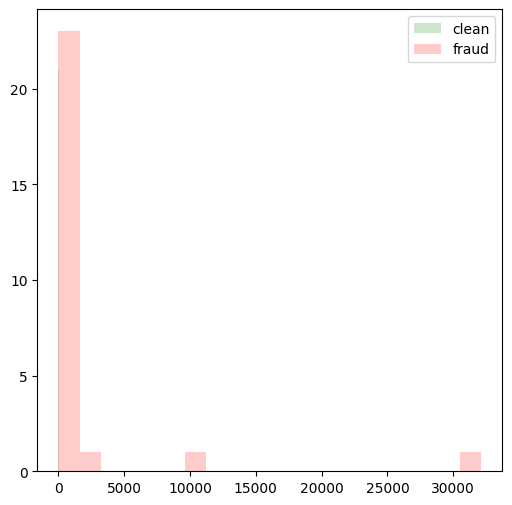

In [ ]:
clean = z_scores[val_y == 0]
fraud = z_scores[val_y == 1]

fig, ax = plt.subplots(figsize=(6,6))
ax.hist(clean, bins=20, density=False, label="clean", alpha=.2, color="green")
ax.hist(fraud, bins=20, density=False, label="fraud", alpha=.2, color="red")

plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import (confusion_matrix, 
                             precision_recall_curve)
from sklearn.metrics import f1_score
# get (mis)classification
cm = confusion_matrix(val_y, outliers)
val_score = (f1_score(val_y, outliers, average = 'macro'))
print(f'Validation Score f1 : [{val_score}]')

# true/false positives/negatives
(tn, fp, 
 fn, tp) = cm.flatten()

Validation Score f1 : [0.6904761904761905]


In [ ]:
cm

array([[20,  6],
       [10, 16]])

In [ ]:
max_f1_score = 0.000
max_theta = -1
max_cm = None
val_list = []
for theta in range(500,10000):
    outliers = z_scores > theta*0.0001
    cm = confusion_matrix(val_y, outliers)
    val_score = (f1_score(val_y, outliers, average = 'macro'))
    print(f'Validation Score f1 : [{val_score}]')
    if val_score > max_f1_score:
        max_theta = theta
        max_f1_score = val_score
    # true/false positives/negatives
        (tn, fp, 
        fn, tp) = cm.flatten()
        max_cm = cm
    val_list.append(val_score)
    

Validation Score f1 : [0.3646616541353383]
Validation Score f1 : [0.3646616541353383]
Validation Score f1 : [0.3646616541353383]
Validation Score f1 : [0.3646616541353383]
Validation Score f1 : [0.3646616541353383]
Validation Score f1 : [0.3646616541353383]
Validation Score f1 : [0.3646616541353383]
Validation Score f1 : [0.3646616541353383]
Validation Score f1 : [0.3646616541353383]
Validation Score f1 : [0.3646616541353383]
Validation Score f1 : [0.3646616541353383]
Validation Score f1 : [0.3646616541353383]
Validation Score f1 : [0.3646616541353383]
Validation Score f1 : [0.3646616541353383]
Validation Score f1 : [0.3646616541353383]
Validation Score f1 : [0.3646616541353383]
Validation Score f1 : [0.3646616541353383]
Validation Score f1 : [0.3646616541353383]
Validation Score f1 : [0.3646616541353383]
Validation Score f1 : [0.3646616541353383]
Validation Score f1 : [0.3646616541353383]
Validation Score f1 : [0.3646616541353383]
Validation Score f1 : [0.3646616541353383]
Validation 

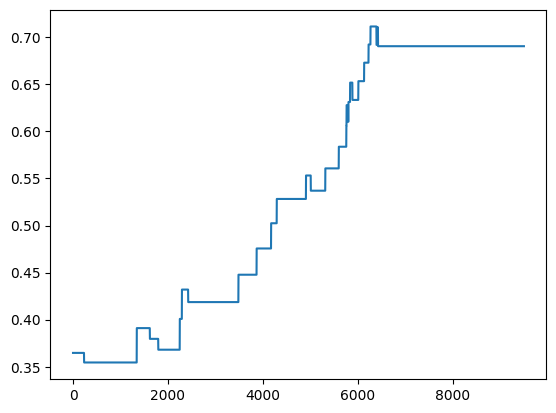

In [ ]:
# plt.figure((6,6))
plt.plot(val_list)

In [ ]:
max_cm

array([[19,  7],
       [ 8, 18]])

In [ ]:
cm

array([[20,  6],
       [10, 16]])

In [ ]:
max_f1_score

0.7114317425083241

In [ ]:
val_score

0.6904761904761905